# "Evolución y Análisis de los Precios Inmobiliarios en Lima: Sector Alto vs. Sector Medio (2013-2024)"

📝 Introducción

El mercado inmobiliario de Lima ha mostrado un crecimiento sostenido en los últimos años, con diferencias notables entre el sector alto (Barranco, Miraflores, San Isidro, Surco) y el sector medio (Jesús María, Lince, Magdalena, San Miguel). Este análisis tiene como objetivo explorar la evolución de los precios por metro cuadrado en ambos sectores entre 2013 y 2024, identificando tendencias, diferencias de precios y el impacto de eventos como la pandemia de COVID-19.

A través de datos históricos, se evaluará el comportamiento de los precios, calculando el Crecimiento Anual Compuesto (CAGR) para cada sector. Además, se analizarán factores externos que han influido en los precios, con el fin de proporcionar una visión detallada sobre la dinámica del mercado inmobiliario limeño y ayudar a la toma de decisiones informadas en el futuro.

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [165]:
df = pd.read_csv('departamentos_Lima.csv', 
                 sep = ';', na_values=['n.d.'])
df.head()

,Unnamed: 0,"Departamentos (Sector Alto): Barranco, La Molina, Miraflores, San Borja, San Isidro y Surco - Precios por m2 (S/ Corrientes)","Departamentos (Sector Medio): Jesús María, Lince, Magdalena, Pueblo Libre, San Miguel y Surquillo - Precios por m2 (S/ Corrientes)"
0,T212,NaN,NaN
1,T312,NaN,NaN
2,T412,NaN,NaN
3,T113,4659.148067,3261.157455
4,T213,4956.295807,3570.370318


In [166]:
#renombramos la columna de la tabla de la base de datos
df = df.rename(columns={'Unnamed: 0': 'Trimestre'})

#Eliminamos los valores nulos
df = df.dropna()

In [167]:
#comprobar datos procesados
df.head()


,Trimestre,"Departamentos (Sector Alto): Barranco, La Molina, Miraflores, San Borja, San Isidro y Surco - Precios por m2 (S/ Corrientes)","Departamentos (Sector Medio): Jesús María, Lince, Magdalena, Pueblo Libre, San Miguel y Surquillo - Precios por m2 (S/ Corrientes)"
3,T113,4659.148067,3261.157455
4,T213,4956.295807,3570.370318
5,T313,5255.946323,3936.531573
6,T413,5157.303930,4004.031798
7,T114,5572.610135,4111.227878


In [168]:
#Filtramos los datos solo por el trimestre 2 de cada año
df_t2 = df[df['Trimestre'].str.contains('T2')]

#Reemplazamos trimestre 2, por 20, para extraer el año
df_t2['Trimestre'] = df_t2['Trimestre'].str.replace('T2', '20')

# Convertimos la columna 'Trimestre' a formato datetime
df_t2['Trimestre'] = pd.to_datetime(df_t2['Trimestre'], format='%Y')

# Establecemos 'Trimestre' como índice
df_t2.set_index('Trimestre', inplace=True)

#Remplazamos el nombre de las columnas a solo 'Sector Alto' y 'Sector Medio'
df_t2 = df_t2.rename(columns={
    
'Departamentos (Sector Alto): Barranco, La Molina, Miraflores, San Borja, San Isidro y Surco - Precios por m2 (S/ Corrientes)': 'sector_alto',
'Departamentos (Sector Medio): Jesús María, Lince, Magdalena, Pueblo Libre, San Miguel y Surquillo - Precios por m2 (S/ Corrientes)': 'sector_medio'
})

# Convertimos todas las columnas numéricas a tipo entero (int)
df_t2 = df_t2.astype('int64')

#Renombramos el índice 'Trimestre' a 'año'
df_t2.index.name = 'año'

df_t2.head()

,sector_alto,sector_medio
año,,
2013-01-01,4956,3570
2014-01-01,5879,4087
2015-01-01,6011,4420
2016-01-01,6091,4689
2017-01-01,6371,4793


##  Análisis Estadístico


In [169]:
df_t2.describe()

,sector_alto,sector_medio
count,12.000000,12.00000
mean,6497.000000,5153.25000
std,746.139397,879.12313
min,4956.000000,3570.00000
25%,6051.500000,4621.75000
50%,6453.500000,5157.50000
75%,7209.750000,6050.00000
max,7415.000000,6276.00000


* Análisis estadístico general

El sector alto tiene precios más altos que el sector medio, con una diferencia promedio de S/ 1,343.75. Aunque ambos sectores han mostrado fluctuaciones, el sector alto es más estable, con una menor variabilidad en los precios (desviación estándar de S/ 746.14 frente a S/ 879.12 en el sector medio). La diferencia de precios entre los sectores ha permanecido constante a lo largo del tiempo, reflejando la exclusividad del sector alto. Sin embargo, el sector medio muestra mayor volatilidad, lo que sugiere una mayor sensibilidad a cambios de demanda o factores externos.

## Análisis de correlación entre ambos sectores

In [170]:
print("Correlación entre Sector Alto y Sector Medio:", df_t2['sector_alto'].corr(df_t2['sector_medio']))

Correlación entre Sector Alto y Sector Medio: 0.971688817690653


La correlación entre los precios del sector alto y el sector medio es de 0.97, lo que indica una relación muy fuerte y positiva entre ambos sectores. Esto sugiere que, a lo largo del tiempo, los precios en ambos sectores tienden a moverse de manera similar: cuando los precios en uno aumentan, también lo hacen en el otro.

Una correlación de 0.97 es bastante alta, lo que implica que las variaciones en los precios de los departamentos en Lima están fuertemente relacionadas, aunque el sector alto siempre presenta precios más elevados. Este comportamiento podría reflejar una tendencia general en el mercado inmobiliario limeño, donde los factores económicos y las dinámicas del mercado afectan a ambos sectores de manera similar, aunque en distintos niveles de precio.

## 1. Tendencia General de los Precios

## Agrupar y Graficar los Datos:

* Precios por metro cuadrado en el tiempo: Se analiza cómo han evolucionado los precios en los sectores alto y medio a lo largo de los años.


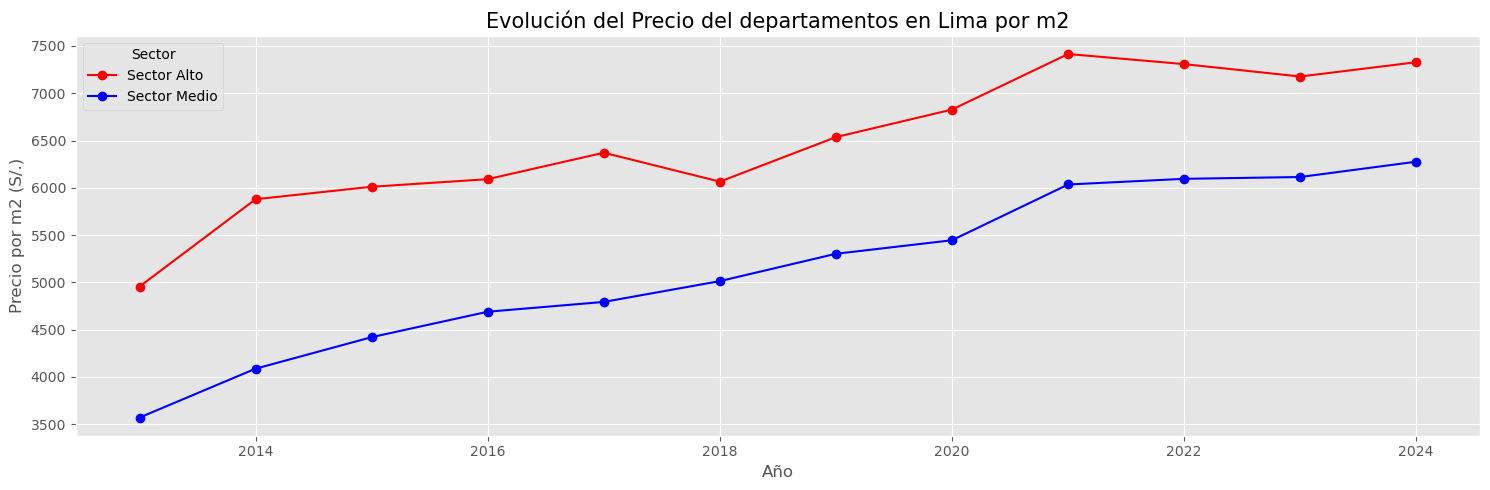

In [171]:
# Graficar la tendencia de precios en ambos sectores
plt.figure(figsize=(15,5))
plt.plot(df_t2.index, df_t2['sector_alto'], label = 'Sector Alto', marker = 'o', color = 'red')
plt.plot(df_t2.index, df_t2['sector_medio'], label = 'Sector Medio', marker = 'o', color = 'blue')

#Personalizar el gráfico
plt.title('Evolución del Precio del departamentos en Lima por m2', fontsize = 15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio por m2 (S/.)', fontsize=12)
plt.legend(title='Sector')

#Ajustamos el diseño y mostramos el gráfico
plt.tight_layout()
plt.show()

📝 Análisis del gráfico

El gráfico muestra la evolución del precio por metro cuadrado de los departamentos en Lima desde 2013 hasta 2024, desglosado en dos segmentos: sector alto y sector medio. A lo largo de este periodo, ambos sectores han experimentado un crecimiento constante, con el sector alto mostrando incrementos más pronunciados. Sin embargo, en los últimos años (2020-2024), la tasa de crecimiento se ha moderado, indicando una posible estabilización del mercado. A pesar de los efectos de la pandemia en 2020, los precios continuaron aumentando, con el sector alto registrando un crecimiento más fuerte que el sector medio. La brecha entre ambos sectores ha disminuido ligeramente en años recientes, lo que sugiere una mayor dinámica de precios en el sector medio. En general, el mercado parece estar alcanzando una fase de equilibrio, con incrementos más sostenibles a medida que avanza el tiempo.

## 2. Comparación entre Sector Alto y Sector Medio

Para analizar la diferencia de precios entre ambos sectores, vamos a calcular la diferencia de precios para cada año y graficarlo.

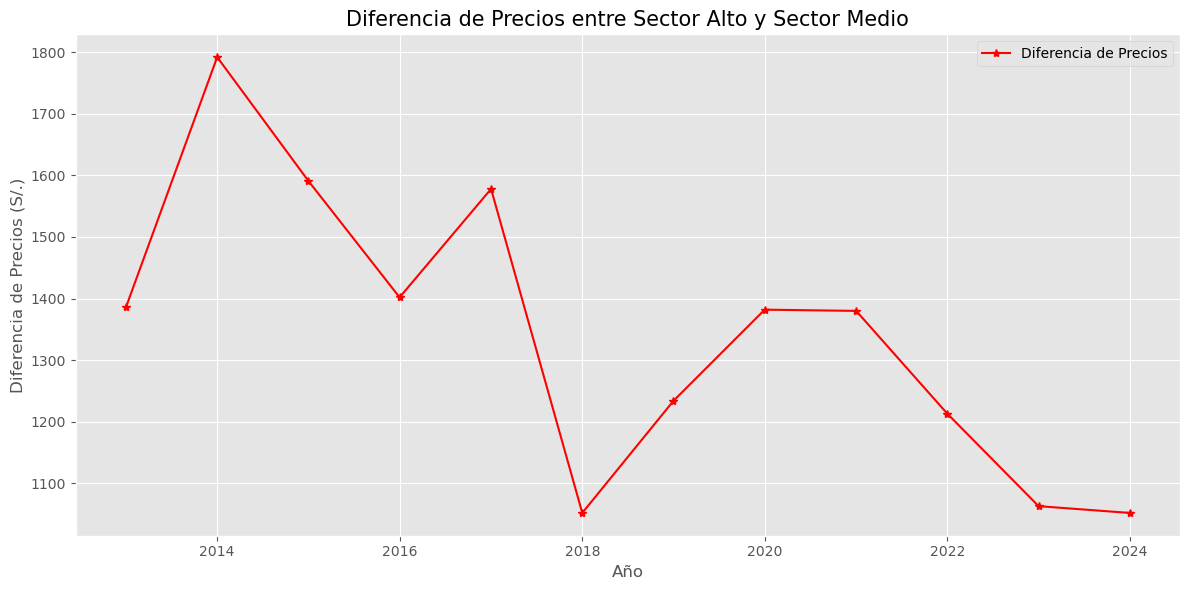

In [172]:
df_new = df_t2
# Calcular la diferencia de precios entre el sector alto y el sector medio
df_new['diferencia_de_precios'] = df_new['sector_alto'] - df_new['sector_medio']

# Graficar la diferencia de precios
plt.figure(figsize=(12, 6))
plt.plot(df_new.index, df_new['diferencia_de_precios'], label='Diferencia de Precios', marker='*', color='red')

# Personalizar el gráfico
plt.title('Diferencia de Precios entre Sector Alto y Sector Medio', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Diferencia de Precios (S/.)', fontsize=12)
plt.legend()

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()

📝 Análisis General:

El gráfico muestra la diferencia de precios entre los departamentos en el sector alto y el sector medio de Lima desde 2013 hasta 2024. A lo largo de este periodo, la diferencia de precios se ha mantenido en niveles elevados, reflejando la disparidad entre ambos sectores. Sin embargo, en los últimos años, especialmente entre 2020 y 2024, se observa una ligera reducción en la brecha de precios. Esto puede ser indicativo de un crecimiento más acelerado de los precios en el sector medio o de una estabilización en el sector alto. A pesar de la pandemia, la diferencia entre ambos sectores ha mostrado una tendencia a mantenerse, sugiriendo que la demanda en el sector alto sigue siendo significativamente más alta, pero con un ajuste en la dinámica del sector medio.

## 3. Cálculo del Crecimiento Anual Compuesto (CAGR)

Calcularemos el CAGR de los precios en ambos sectores utilizando la fórmula mencionada.

In [173]:
# Función para calcular el CAGR
def calcular_carg(valor_inicial, valor_final, años):
    return (valor_final / valor_inicial)** (1/años)-1

# Calcular el CAGR para ambos sectores
carg_alto = calcular_carg(df_new['sector_alto'].iloc[0], df_new['sector_alto'].iloc[-1], len(df_new)-1)
carg_medio = calcular_carg(df_new['sector_medio'].iloc[0], df_new['sector_medio'].iloc[-1], len(df_new)-1)

print('Crecimiento Anual Compuesto(CARG)\n')
print(f'CARG del Sector Alto: {carg_alto * 100: .2f}%')
print(f'CARG del Sector Medio: {carg_medio * 100: .2f}%')

Crecimiento Anual Compuesto(CARG)

CARG del Sector Alto:  3.62%
CARG del Sector Medio:  5.26%


📝 Análisis del Crecimiento Anual Compuesto (CAGR):

El CAGR del sector alto es del 3.62%, mientras que el sector medio ha experimentado un crecimiento más acelerado, con un CAGR del 5.26%. Esto indica que, aunque ambos sectores han tenido un crecimiento constante en el tiempo, el sector medio ha mostrado una expansión más rápida en comparación con el sector alto. Esta diferencia puede reflejar una mayor demanda en zonas intermedias de la ciudad, posiblemente impulsada por factores económicos, como una mayor accesibilidad para la población, frente a un mercado más exclusivo y estable en el sector alto.

## 4. Impacto de la Pandemia (2020)

Para analizar el impacto de la pandemia en los precios, podemos observar el cambio en los precios de 2019 a 2021.

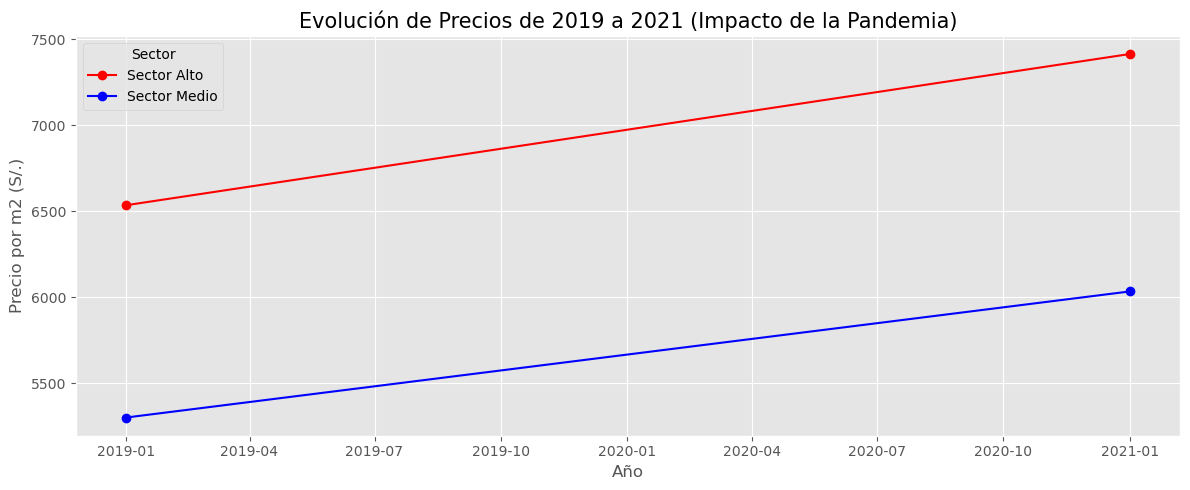

Diferencia de precios del Sector Alto (2019-2021): 879 S/.
Diferencia de precios del Sector Medio (2019-2021): 733 S/.


In [174]:
# Calcular la diferencia de precios de 2019 a 2020
df_impacto_2020 = df_new[df_new.index.isin(['2019-01-01', '2021-01-01'])]

# Graficar los precios de 2019 a 2020
plt.figure(figsize=(12, 5))
plt.plot(df_impacto_2020.index, df_impacto_2020['sector_alto'], label='Sector Alto', marker='o', color='red')
plt.plot(df_impacto_2020.index, df_impacto_2020['sector_medio'], label='Sector Medio', marker='o', color='blue')

# Personalizar el gráfico
plt.title('Evolución de Precios de 2019 a 2021 (Impacto de la Pandemia)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio por m2 (S/.)', fontsize=12)
plt.legend(title='Sector')
plt.tight_layout()
plt.show()

# Diferencia de precios entre 2019 y 2021
diferencia_2020 = df_impacto_2020['sector_alto'].iloc[1] - df_impacto_2020['sector_alto'].iloc[0], df_impacto_2020['sector_medio'].iloc[1] - df_impacto_2020['sector_medio'].iloc[0]
print(f"Diferencia de precios del Sector Alto (2019-2021): {diferencia_2020[0]:.0f} S/.")
print(f"Diferencia de precios del Sector Medio (2019-2021): {diferencia_2020[1]:.0f} S/.")


📝 Análisis del Impacto de la Pandemia (2019-2020):

En el periodo de 2020 a 2021, la reducción de las tasas de interés a niveles históricamente bajos de 2.25% a 0.25% (enero 2020 - junio 2020)tuvo un impacto positivo en la demanda de propiedades, especialmente en el sector alto. Además, la migración interna, específicamente venezolanos hacia zonas periféricas de Lima podría haber incrementado la demanda en el sector medio, lo que se refleja en el crecimiento más acelerado de los precios en comparación con el sector alto.

## 5. Estabilidad en los Precios Recientes (2023-2024)

Para analizar la estabilidad reciente, graficamos los precios de 2023 y 2024 y calcular su variación.

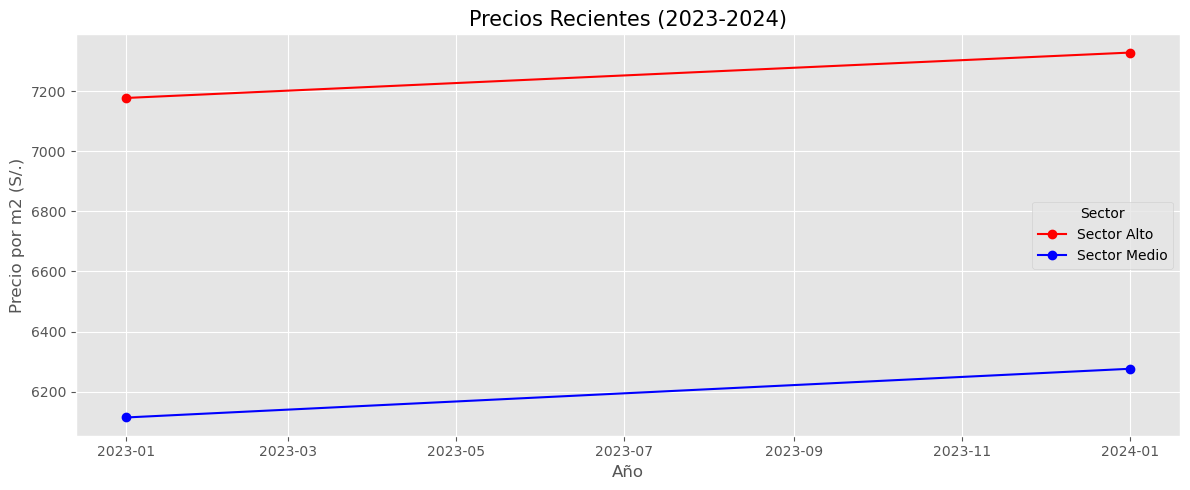

Variación de precios del Sector Alto (2023-2024): 151.00 S/.
Variación de precios del Sector Medio (2023-2024): 162.00 S/.


In [175]:
# Extraer los datos de 2023 y 2024
df_reciente = df_new[df_new.index.isin(['2023-01-01', '2024-01-01'])]

# Graficar los precios de 2023 y 2024
plt.figure(figsize=(12, 5))
plt.plot(df_reciente.index, df_reciente['sector_alto'], label='Sector Alto', marker='o', color='red')
plt.plot(df_reciente.index, df_reciente['sector_medio'], label='Sector Medio', marker='o', color='blue')

# Personalizar el gráfico
plt.title('Precios Recientes (2023-2024)', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio por m2 (S/.)', fontsize=12)
plt.legend(title='Sector')
plt.tight_layout()
plt.show()

# Calcular la variación de precios de 2023 a 2024
variacion_2024 = df_reciente['sector_alto'].iloc[1] - df_reciente['sector_alto'].iloc[0], df_reciente['sector_medio'].iloc[1] - df_reciente['sector_medio'].iloc[0]
print(f"Variación de precios del Sector Alto (2023-2024): {variacion_2024[0]:.2f} S/.")
print(f"Variación de precios del Sector Medio (2023-2024): {variacion_2024[1]:.2f} S/.")

Análisis de la Estabilidad de Precios (2023-2024):

La gráfica revela una estabilización de los precios tanto en el sector alto como en el sector medio durante los últimos dos años. En ambos sectores, los aumentos de precios han sido más moderados, lo que indica una desaceleración en el ritmo de crecimiento. Esto podría sugerir que el mercado inmobiliario está alcanzando un punto de equilibrio después de años de incrementos más acelerados, posiblemente debido a una saturación del mercado o a una demanda más estable. En el sector medio, aunque los precios continúan aumentando, la tasa de crecimiento es más baja, lo que refleja una tendencia hacia la estabilidad en ambas áreas.

## 6.Proyección de precios por sectores por m2 para el año 2040

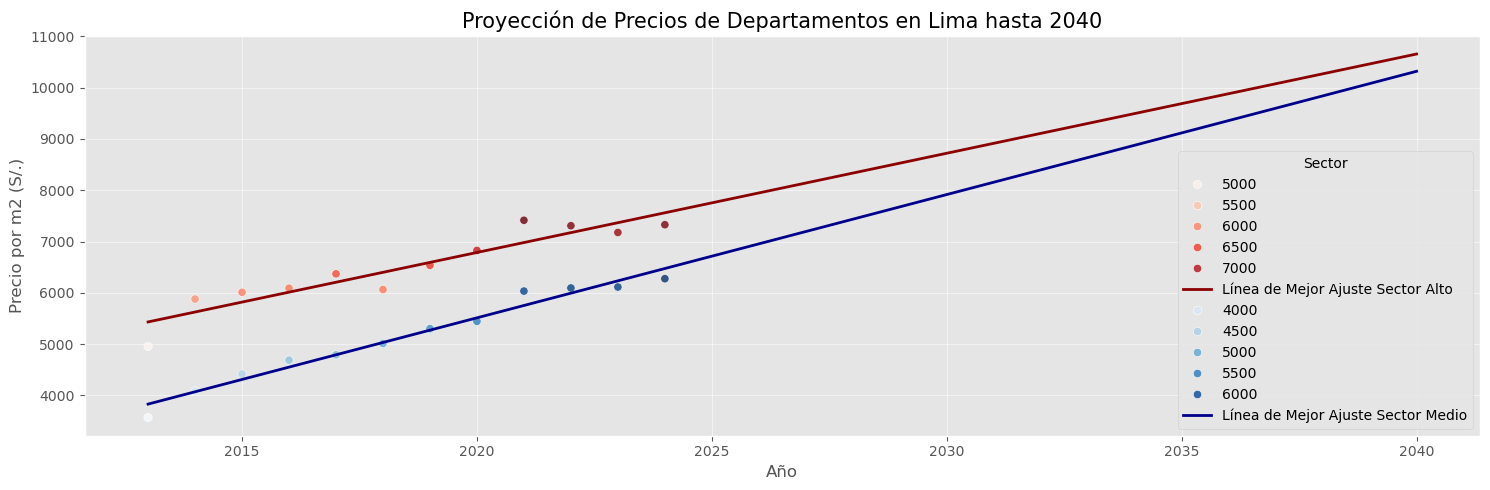

El precio proyectado para el Sector Alto en 2040 es: 10655.07 S/.
El precio proyectado para el Sector Medio en 2040 es: 10318.44 S/.


In [182]:
# Convertir el índice de fecha a años
df_new['Año'] = df_new.index.year

# Crear el gráfico de dispersión para el sector alto
plt.figure(figsize=(15, 5))
sns.scatterplot(x=df_new['Año'], y='sector_alto', data=df_new, 
                hue='sector_alto', palette='Reds', alpha=0.8)

# Calcular la línea de mejor ajuste para el sector alto
slope_alto, intercept_alto, r_value, p_value, std_error = linregress(df_new['Año'], df_new['sector_alto'])

# Crear valores del eje x para proyectar la línea de mejor ajuste hasta 2040
years_extended = np.arange(2013, 2041)
sector_alto_predicted = intercept_alto + slope_alto * years_extended

# Graficar la línea de mejor ajuste para el sector alto
sns.lineplot(x=years_extended, y=sector_alto_predicted, color='darkred', 
             label='Línea de Mejor Ajuste Sector Alto', linewidth=2)

# Crear el gráfico de dispersión para el sector medio
sns.scatterplot(x=df_new['Año'], y='sector_medio', data=df_new, 
                hue='sector_medio', palette='Blues', alpha=0.8)

# Calcular la línea de mejor ajuste para el sector medio
slope_medio, intercept_medio, r_value, p_value, std_error = linregress(df_new['Año'], df_new['sector_medio'])

# Crear valores del eje x para proyectar la línea de mejor ajuste hasta 2040
sector_medio_predicted = intercept_medio + slope_medio * years_extended

# Graficar la línea de mejor ajuste para el sector medio
sns.lineplot(x=years_extended, y=sector_medio_predicted, color='darkblue', 
             label='Línea de Mejor Ajuste Sector Medio', linewidth=2)

# Personalizar el gráfico
plt.title('Proyección de Precios de Departamentos en Lima hasta 2040', fontsize=15)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Precio por m2 (S/.)', fontsize=12)
plt.legend(title='Sector', fontsize=10)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

# Predicción de precios para 2040
sector_alto_2040 = intercept_alto + slope_alto * 2040
sector_medio_2040 = intercept_medio + slope_medio * 2040

print(f'El precio proyectado para el Sector Alto en 2040 es: {sector_alto_2040:.2f} S/.')
print(f'El precio proyectado para el Sector Medio en 2040 es: {sector_medio_2040:.2f} S/.')

📝 Análisis del gráfico de proyección:

El gráfico sugiere que el mercado inmobiliario en Lima continuará experimentando un aumento en los precios, especialmente en el Sector Alto, con una proyección moderada pero consistente hasta 2040. Este aumento en los precios podría reflejar una mayor valorización de los bienes raíces en sectores exclusivos y el crecimiento de la demanda de propiedades en zonas más accesibles, aunque a un ritmo más lento.

Invertir en bienes raíces en Lima, ya sea en el Sector Alto o en el Sector Medio, es una buena opción de inversión debido al continuo aumento de los precios y la estabilidad que ofrece el mercado inmobiliario. Ambos sectores ofrecen proyecciones positivas hasta 2040, lo que significa que, con el tiempo, los inversionistas podrían ver un retorno significativo sobre su inversión.

Es importante tener en cuenta que estas proyecciones están basadas en una regresión lineal y podrían verse afectadas por diversos factores imprevistos, como cambios en las políticas económicas, tasas de interés, o fluctuaciones en la oferta y demanda inmobiliaria.